In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# be careful with that:
import warnings
warnings.filterwarnings('ignore')

In [11]:
data_heatmap_1 = pd.read_csv('/home/jean/School/columbia/spring24/capstone/broken-banner-detection/datasets/A_data_heatmap_300x250_6p_h2m.csv')
data_heatmap_2 = pd.read_csv('/home/jean/School/columbia/spring24/capstone/broken-banner-detection/datasets/A_data_heatmap_300x250_6p_t2m.csv')
data_heatmap = pd.concat([data_heatmap_1, data_heatmap_2], ignore_index=True)
# data_heatmap.to_csv('/home/jean/School/columbia/spring24/capstone/broken-banner-detection/datasets/data_6p_combined.csv')

In [21]:
data_heatmap.columns

Index(['Unnamed: 0', 'domain', 'grid_id', 'click_x', 'click_y',
       'display_height', 'display_width', 'clicks', 'click_x_rel',
       'click_y_rel'],
      dtype='object')

In [9]:
# load data

data_heatmap = pd.read_csv('/home/jean/School/columbia/spring24/capstone/broken-banner-detection/datasets/data_6p_combined.csv')
#data_heatmap = pd.read_csv('../datasets/A_data_heatmap_300x250_3p.csv')
#data_metrics = pd.read_csv('../datasets/A_data_domain_perf_metrics_300x250_3p.csv')

In [43]:
data_heatmap

,Unnamed: 0,domain,grid_id,click_x,click_y,display_height,display_width,clicks,click_x_rel,click_y_rel
0,0,ID_4427,333346,205,141,250,300,1,27.0,23.0
1,1,ID_4427,333346,295,137,250,300,1,39.0,22.0
2,2,ID_4427,333346,228,99,250,300,1,30.0,16.0
3,3,ID_4427,333346,196,121,250,300,1,26.0,19.0
4,4,ID_4427,333346,258,135,250,300,1,34.0,22.0
...,...,...,...,...,...,...,...,...,...,...
4075991,4075991,ID_1220,333346,166,107,250,300,6,22.0,17.0
4075992,4075992,ID_1220,333346,241,123,250,300,4,32.0,20.0
4075993,4075993,ID_1220,333346,180,191,250,300,3,24.0,31.0
4075994,4075994,ID_1220,333346,230,104,250,300,2,31.0,17.0


In [24]:
# expand so that each row corresponds to 1 click:

data_heatmap_expanded = data_heatmap.loc[data_heatmap.index.repeat(data_heatmap['clicks'])].reset_index(drop=True)
data_heatmap_expanded['clicks'] = 1

click_stat = data_heatmap_expanded.groupby(['click_x','click_y'])['clicks'].count().reset_index()

In [ ]:
data_heatmap # ling - 4151992 rows vs me 4075996 rows

,Unnamed: 0,domain,grid_id,click_x,click_y,display_height,display_width,clicks,click_x_rel,click_y_rel
0,2000000,ID_2674,333346,62,137,250,300,1,8.0,22.0
1,2000001,ID_2674,333346,66,93,250,300,1,9.0,15.0
2,2000002,ID_2674,333346,249,154,250,300,1,33.0,25.0
3,2000003,ID_2674,333346,86,156,250,300,1,11.0,25.0
4,2000004,ID_2674,333346,71,131,250,300,1,9.0,21.0
...,...,...,...,...,...,...,...,...,...,...
4151987,4075991,ID_1220,333346,166,107,250,300,6,22.0,17.0
4151988,4075992,ID_1220,333346,241,123,250,300,4,32.0,20.0
4151989,4075993,ID_1220,333346,180,191,250,300,3,24.0,31.0
4151990,4075994,ID_1220,333346,230,104,250,300,2,31.0,17.0


In [ ]:
data_heatmap

In [28]:
# Binning clicks in nr_of_x_bins, nr_of_y_bins:

NR_OF_X_BINS = 61
NR_OF_Y_BINS = 51

max_width = data_heatmap['display_width'].max()
max_height = data_heatmap['display_height'].max()

width_bins = np.linspace(1, max_width, NR_OF_X_BINS)
height_bins = np.linspace(1, max_height, NR_OF_Y_BINS)

width_bins_max = len(width_bins)-2 # start at 0
height_bins_max = len(height_bins)-2

data_heatmap_expanded['click_x_bin'] = pd.cut(data_heatmap_expanded['click_x'], 
                                      bins = width_bins, 
                                      labels=False, 
                                      include_lowest=True)

data_heatmap_expanded['click_y_bin'] = pd.cut(data_heatmap_expanded['click_y'], 
                                      bins=height_bins, 
                                      labels=False, 
                                      include_lowest=True)


aggregated_clicks = data_heatmap_expanded.groupby(['grid_id',
                                           'domain', 
                                           'click_x_bin', 
                                           'click_y_bin']).size().reset_index(name='clicks_sum')


#aggregated_clicks['clicks_sum'].astype('int64');

In [29]:
aggregated_clicks

,grid_id,domain,click_x_bin,click_y_bin,clicks_sum
0,333346,ID_1003,0,0,27
1,333346,ID_1003,0,1,29
2,333346,ID_1003,0,2,9
3,333346,ID_1003,0,3,2
4,333346,ID_1003,0,5,1
...,...,...,...,...,...
1666822,333519,ID_999,59,40,2
1666823,333519,ID_999,59,41,1
1666824,333519,ID_999,59,42,1
1666825,333519,ID_999,59,45,1


In [30]:
# add empty bins --> easier to generate vectors
# takes a few seconds

from itertools import product

domains_grids = data_heatmap[['domain', 'grid_id']].drop_duplicates()

aux = pd.DataFrame(list(product(range(0,width_bins_max+1), 
                                range(0,height_bins_max+1))), 
                   columns=['click_x_bin', 'click_y_bin'])

domains_grids['key'] = 1
aux['key'] = 1

expanded_set = pd.merge(domains_grids, aux, on='key').drop('key', axis=1)

data_binned = pd.merge(expanded_set, aggregated_clicks, 
                  on = ['domain', 'grid_id', 'click_x_bin', 'click_y_bin'], 
                  how = 'left').fillna(0)
data_binned['clicks_sum'] = data_binned['clicks_sum'].astype('int64')
# data_binned = data_binned[data_binned['grid_id'] == 333519]

In [31]:
data_binned['grid_id'].unique()

array([333346, 333519])

In [32]:
data_binned['grid_id'].unique()

array([333346, 333519])

In [33]:

grid_id = 333346

data_binned = data_binned[data_binned['grid_id'] == grid_id]

In [34]:
data_binned.shape

(2907000, 5)

In [35]:
data_binned

,domain,grid_id,click_x_bin,click_y_bin,clicks_sum
0,ID_4427,333346,0,0,0
1,ID_4427,333346,0,1,0
2,ID_4427,333346,0,2,0
3,ID_4427,333346,0,3,0
4,ID_4427,333346,0,4,0
...,...,...,...,...,...
9089995,ID_1220,333346,59,45,8
9089996,ID_1220,333346,59,46,2
9089997,ID_1220,333346,59,47,6
9089998,ID_1220,333346,59,48,10


# PCA code

In [37]:
# Assuming data_binned is your DataFrame
# Use pivot_table to create a wide-format DataFrame
pivot_df = pd.pivot_table(data_binned, values='clicks_sum', index=['domain', 'grid_id'],
                           columns=['click_x_bin', 'click_y_bin'], aggfunc='sum', fill_value=0)

# Reset index to make 'domain' and 'grid_id' regular columns
pivot_df.reset_index(inplace=True)

# Rename columns to match the desired format
pivot_df.columns = ['domain', 'grid_id'] + [f'clicks_sum_for_{x}_{y}' for x, y in pivot_df.columns[2:]]

# Display the resulting DataFrame
#print(pivot_df)


In [42]:
data_heatmap

,Unnamed: 0,domain,grid_id,click_x,click_y,display_height,display_width,clicks,click_x_rel,click_y_rel
0,0,ID_4427,333346,205,141,250,300,1,27.0,23.0
1,1,ID_4427,333346,295,137,250,300,1,39.0,22.0
2,2,ID_4427,333346,228,99,250,300,1,30.0,16.0
3,3,ID_4427,333346,196,121,250,300,1,26.0,19.0
4,4,ID_4427,333346,258,135,250,300,1,34.0,22.0
...,...,...,...,...,...,...,...,...,...,...
4075991,4075991,ID_1220,333346,166,107,250,300,6,22.0,17.0
4075992,4075992,ID_1220,333346,241,123,250,300,4,32.0,20.0
4075993,4075993,ID_1220,333346,180,191,250,300,3,24.0,31.0
4075994,4075994,ID_1220,333346,230,104,250,300,2,31.0,17.0


In [41]:
unique_occurrences = data_heatmap.drop_duplicates(subset=['domain', 'grid_id']).shape[0]

# Print the number of unique occurrences
print(unique_occurrences)

3030


In [38]:
print(pivot_df)

      domain  grid_id  clicks_sum_for_0_0  clicks_sum_for_0_1  \
0    ID_1003   333346                  27                  29   
1    ID_1007   333346                   0                   2   
2    ID_1013   333346                   0                   1   
3    ID_1022   333346                   0                   0   
4    ID_1030   333346                   0                   0   
..       ...      ...                 ...                 ...   
964   ID_992   333346                   0                   1   
965   ID_993   333346                   0                   0   
966   ID_994   333346                   0                   0   
967   ID_995   333346                   0                   0   
968   ID_999   333346                   0                   0   

     clicks_sum_for_0_2  clicks_sum_for_0_3  clicks_sum_for_0_4  \
0                     9                   2                   0   
1                     0                   0                   0   
2                 

In [39]:
print(pivot_df)

      domain  grid_id  clicks_sum_for_0_0  clicks_sum_for_0_1  \
0    ID_1003   333346                  27                  29   
1    ID_1007   333346                   0                   2   
2    ID_1013   333346                   0                   1   
3    ID_1022   333346                   0                   0   
4    ID_1030   333346                   0                   0   
..       ...      ...                 ...                 ...   
964   ID_992   333346                   0                   1   
965   ID_993   333346                   0                   0   
966   ID_994   333346                   0                   0   
967   ID_995   333346                   0                   0   
968   ID_999   333346                   0                   0   

     clicks_sum_for_0_2  clicks_sum_for_0_3  clicks_sum_for_0_4  \
0                     9                   2                   0   
1                     0                   0                   0   
2                 

In [ ]:
input = pivot_df

# Move the index to the first column
#input.reset_index(inplace=True)

# Display the resulting DataFrame

In [ ]:
x = input.copy()

In [ ]:
x.iloc[:,2:] = (input.iloc[:,2:].transpose()/input.iloc[:,2:].sum(axis=1)).transpose()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

features = x.columns[2:] #input.columns[1:]  # Exclude the first column, which is the index

# Select the number of components (in this case, reduce to 2 dimensions)
n_components = 200

# Instantiate the PCA model
# pca = PCA(n_components=n_components)

pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=n_components))])

# Fit and transform the data
pca_result = pipeline.fit_transform(x[features])

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(n_components)])

# Concatenate the first column (index) from pca_input to pca_df
pca_df['domain'] = x['domain']

# Display the resulting DataFrame
print(pca_df)

          PC1       PC2        PC3        PC4       PC5       PC6       PC7  \
0    8.028630 -4.368884  19.815479  13.517185 -6.943180 -3.864186 -3.883604   
1   -4.652103  4.737479   0.119118  -1.340229  0.208647  1.161864  0.328060   
2   -2.077498  4.921418   3.961364  -3.334296 -0.976293  3.373570  3.241540   
3   -6.348735  6.983504   1.052068  -2.948786  0.178285  0.242912  1.967453   
4   -7.599040  4.750482  -1.867000  -0.482649 -1.948642  0.211380 -1.360641   
..        ...       ...        ...        ...       ...       ...       ...   
241 -4.685494  6.336105  -1.081268  -1.368341  0.226618  0.527402  1.197950   
242 -3.686842  0.812086   1.428004  -1.494912 -1.045248 -0.710795 -1.521383   
243 -6.583459  6.385302   1.753496  -0.794890  1.384946  3.370592  0.923983   
244 -1.837838  3.680569  -0.624061   0.714885 -1.324369  0.760615  3.105860   
245 -4.470188  2.617697  -2.131155   0.519462  0.242767 -0.446458 -1.506800   

          PC8       PC9      PC10  ...     PC192   

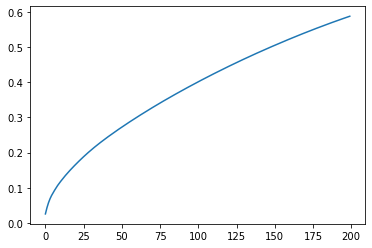

In [ ]:
pca_object = pipeline.named_steps['pca']
pca_exp_var = pca_object.explained_variance_ratio_
plt.plot(np.cumsum(pca_exp_var))

In [ ]:
features = x.columns[2:] #input.columns[1:]  # Exclude the first column, which is the index

# Select the number of components (in this case, reduce to 2 dimensions)
n_components = 2

# Instantiate the PCA model
# pca = PCA(n_components=n_components)

pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=n_components))])

# Fit and transform the data
pca_result = pipeline.fit_transform(x[features])

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(n_components)])

# Concatenate the first column (index) from pca_input to pca_df
pca_df['domain'] = x['domain']

In [ ]:
cb_333519 = ['ID_1184', 'ID_1281', 'ID_1305', 'ID_1353', 'ID_1448', 'ID_1522',
       'ID_1544', 'ID_162', 'ID_1682', 'ID_1690', 'ID_1824', 'ID_1888',
       'ID_1929', 'ID_2076', 'ID_2097', 'ID_2226', 'ID_2249', 'ID_2268',
       'ID_2331', 'ID_2339', 'ID_2386', 'ID_2396', 'ID_2438', 'ID_258',
       'ID_2609', 'ID_2680', 'ID_2863', 'ID_2883', 'ID_2908', 'ID_3061',
       'ID_3243', 'ID_3250', 'ID_3314', 'ID_3382', 'ID_3397', 'ID_3402',
       'ID_3420', 'ID_3459', 'ID_3470', 'ID_3540', 'ID_398', 'ID_409',
       'ID_484', 'ID_489', 'ID_526', 'ID_549', 'ID_580', 'ID_665',
       'ID_810', 'ID_84', 'ID_857', 'ID_86', 'ID_905', 'ID_927', 'ID_934',
       'ID_962', 'ID_986']

In [ ]:
cb_333346 = ['ID_1247', 'ID_162', 'ID_2534', 'ID_2742', 'ID_526', 'ID_2201',
       'ID_1165', 'ID_743', 'ID_199', 'ID_2145', 'ID_2569', 'ID_643',
       'ID_1305', 'ID_3180', 'ID_3158', 'ID_136', 'ID_293', 'ID_1753',
       'ID_1849', 'ID_2226', 'ID_1462', 'ID_626', 'ID_2863', 'ID_3243',
       'ID_3250', 'ID_1708', 'ID_1238', 'ID_580', 'ID_84', 'ID_2568',
       'ID_2340', 'ID_1803', 'ID_3470', 'ID_139', 'ID_2619', 'ID_2908',
       'ID_1281', 'ID_3308', 'ID_2883', 'ID_1320', 'ID_1333', 'ID_1062',
       'ID_149', 'ID_260', 'ID_599', 'ID_1513', 'ID_3402', 'ID_1888',
       'ID_2972', 'ID_398', 'ID_2339', 'ID_1030', 'ID_3382', 'ID_2076',
       'ID_1646', 'ID_1077', 'ID_10', 'ID_1153', 'ID_1533', 'ID_2609',
       'ID_1214', 'ID_810', 'ID_2097', 'ID_2386', 'ID_1585', 'ID_549',
       'ID_3420', 'ID_3397', 'ID_2006', 'ID_561', 'ID_1542', 'ID_1570',
       'ID_1819', 'ID_1413', 'ID_1240', 'ID_793', 'ID_831', 'ID_3188',
       'ID_1437', 'ID_556', 'ID_1134', 'ID_314', 'ID_2836', 'ID_1483',
       'ID_2676', 'ID_665', 'ID_15', 'ID_2755', 'ID_2194', 'ID_1682',
       'ID_2775', 'ID_1923', 'ID_1846', 'ID_1262', 'ID_3314', 'ID_1448',
       'ID_1770', 'ID_2626', 'ID_3296', 'ID_489', 'ID_1963', 'ID_1268',
       'ID_1568', 'ID_1094', 'ID_2267', 'ID_409', 'ID_1650', 'ID_1522',
       'ID_927', 'ID_2302', 'ID_1929', 'ID_1435', 'ID_1353']

In [ ]:
pca_df['label'] = 0

In [ ]:
pca_df.loc[pca_df.domain.isin(cb_333346),'label'] = 1

In [ ]:
pca_df['label'].sum()

4

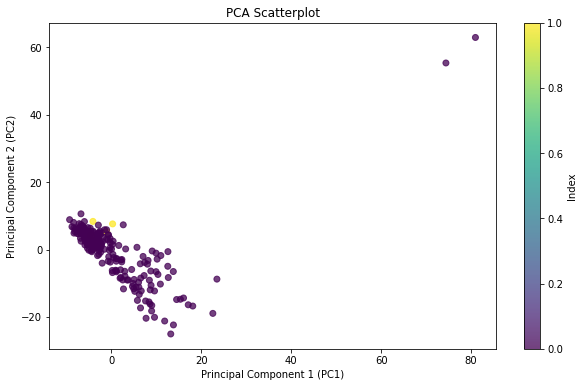

In [ ]:
# Plotting pca_df
pca_df1 = pca_df
plt.figure(figsize=(10, 6))
plt.scatter(pca_df1['PC1'], pca_df1['PC2'], c=pca_df1['label'], cmap='viridis', alpha=0.75)
plt.title('PCA Scatterplot')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.colorbar(label='Index')

# plt.show()

plt.savefig(f'PCA_gridid_{grid_id}.jpg')

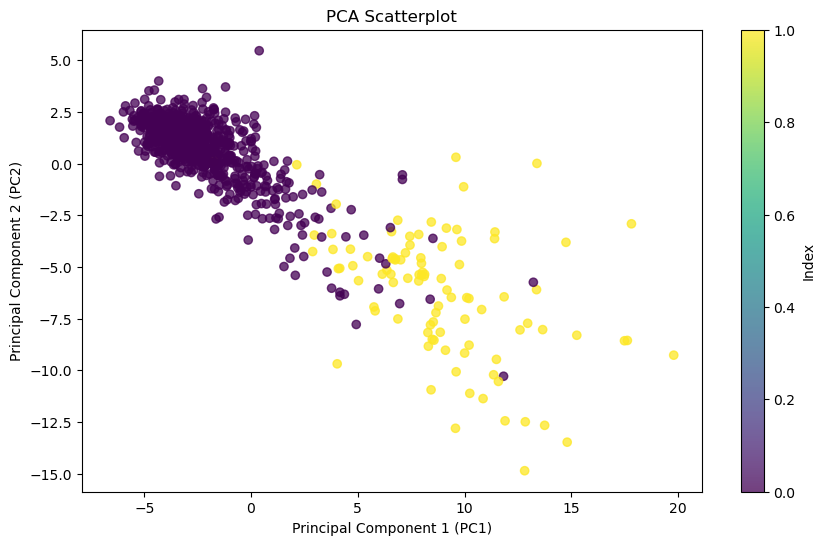

In [ ]:
# Plotting pca_df
pca_df1 = pca_df[pca_df.PC1<20]
plt.figure(figsize=(10, 6))
plt.scatter(pca_df1['PC1'], pca_df1['PC2'], c=pca_df1['label'], cmap='viridis', alpha=0.75)
plt.title('PCA Scatterplot')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.colorbar(label='Index')

# plt.show()

plt.savefig(f'PCA_gridid_{grid_id}.jpg')

# CV code

In [ ]:
# aggregated clicks by grid_id:
aggregated_clicks['ID'] = aggregated_clicks['grid_id'].astype(str) + '_' + aggregated_clicks['domain'].astype(str)

In [ ]:
aggregated_clicks_ID = aggregated_clicks['ID'].unique()

In [ ]:
aggregated_clicks_ID

In [ ]:
for unique_ID in aggregated_clicks_ID:
    # unique_ID = '333346_ID_1'
    ex = aggregated_clicks[aggregated_clicks.ID == unique_ID]

    click_matrix = ex.pivot("click_y_bin","click_x_bin", "clicks_sum").fillna(0)

    plt.figure(figsize=(18, 16))
    sns.heatmap(click_matrix, 
                cmap = "YlGnBu", 
                annot = False, 
                cbar = True, 
                fmt = "g")

    plt.title(f'Click Heatmap for combined clicks in grid = {333519}')
    plt.xlabel('click_x Bin')
    plt.ylabel('click_y Bin')
    plt.gca().invert_yaxis() 
    #plt.savefig('hm_333519.png', bbox_inches='tight')
    plt.show()

    ex = aggregated_clicks[aggregated_clicks.ID == unique_ID]

    click_matrix = ex.pivot("click_y_bin","click_x_bin", "clicks_sum").fillna(0)

    plt.figure(figsize=(18, 16))
    sns.heatmap(click_matrix, 
                cmap = "YlGnBu", 
                annot = False, 
                cbar = True, 
                fmt = "g")

    plt.title(f'Click Heatmap for combined clicks in ID = {unique_ID}')
    plt.xlabel('click_x Bin')
    plt.ylabel('click_y Bin')
    plt.gca().invert_yaxis() 
    plt.savefig(f'../datasets/heatmaps/hm_{unique_ID}.png', bbox_inches='tight')
    # plt.show()

In [ ]:
# create aggregated heatmaps:

ex = aggregated_clicks_by_grid[aggregated_clicks_by_grid.grid_id == 333519]

click_matrix = ex.pivot("click_y_bin","click_x_bin", "clicks_sum").fillna(0)

plt.figure(figsize=(18, 16))
sns.heatmap(click_matrix, 
            cmap = "YlGnBu", 
            annot = False, 
            cbar = True, 
            fmt = "g")

plt.title(f'Click Heatmap for combined clicks in grid = {333519}')
plt.xlabel('click_x Bin')
plt.ylabel('click_y Bin')
plt.gca().invert_yaxis() 
#plt.savefig('hm_333519.png', bbox_inches='tight')
plt.show()

ex = aggregated_clicks_by_grid[aggregated_clicks_by_grid.grid_id == 333346]

click_matrix = ex.pivot("click_y_bin","click_x_bin", "clicks_sum").fillna(0)

plt.figure(figsize=(18, 16))
sns.heatmap(click_matrix, 
            cmap = "YlGnBu", 
            annot = False, 
            cbar = True, 
            fmt = "g")

plt.title(f'Click Heatmap for combined clicks in grid = {333346}')
plt.xlabel('click_x Bin')
plt.ylabel('click_y Bin')
plt.gca().invert_yaxis() 
#plt.savefig('hm_333519.png', bbox_inches='tight')
plt.show()

# Other code

In [ ]:
# for clustering

data_binned[(data_binned.domain == 'ID_1763') &
            (data_binned.grid_id == 333519)]['clicks_sum'].to_numpy()

In [ ]:
cl_stat = aggregated_clicks.groupby(['click_x_bin','click_y_bin']).count().reset_index()
cl_stat = cl_stat[['click_x_bin','click_y_bin','clicks_sum']]
cl_stat['bin_prob'] = cl_stat['clicks_sum']/cl_stat['clicks_sum'].sum()

In [ ]:
# aggregated clicks by grid_id:

aggregated_clicks_by_grid = aggregated_clicks.groupby([
                                'grid_id','click_x_bin','click_y_bin'
                            ]).sum('clicks_sum').reset_index()

In [ ]:
distinct_values_count = aggregated_clicks_by_grid.groupby('grid_id').nunique()
print(distinct_values_count)

------

# Some visualization

In [ ]:
aggregated_clicks_by_grid

In [ ]:
# create aggregated heatmaps:

ex = aggregated_clicks_by_grid[aggregated_clicks_by_grid.grid_id == 333519]

click_matrix = ex.pivot("click_y_bin","click_x_bin", "clicks_sum").fillna(0)

plt.figure(figsize=(18, 16))
sns.heatmap(click_matrix, 
            cmap = "YlGnBu", 
            annot = False, 
            cbar = True, 
            fmt = "g")

plt.title(f'Click Heatmap for combined clicks in grid = {333519}')
plt.xlabel('click_x Bin')
plt.ylabel('click_y Bin')
plt.gca().invert_yaxis() 
#plt.savefig('hm_333519.png', bbox_inches='tight')
plt.show()

ex = aggregated_clicks_by_grid[aggregated_clicks_by_grid.grid_id == 333346]

click_matrix = ex.pivot("click_y_bin","click_x_bin", "clicks_sum").fillna(0)

plt.figure(figsize=(18, 16))
sns.heatmap(click_matrix, 
            cmap = "YlGnBu", 
            annot = False, 
            cbar = True, 
            fmt = "g")

plt.title(f'Click Heatmap for combined clicks in grid = {333346}')
plt.xlabel('click_x Bin')
plt.ylabel('click_y Bin')
plt.gca().invert_yaxis() 
#plt.savefig('hm_333519.png', bbox_inches='tight')
plt.show()

In [ ]:
# Boxplots and histograms

x = aggregated_clicks.groupby(['domain','grid_id']).sum().reset_index()

data_333519 = x[x.grid_id == 333519]['clicks_sum']
data_333346 = x[x.grid_id == 333346]['clicks_sum']

plt.figure(figsize=(10, 6))
plt.boxplot([data_333519, data_333346], labels=['grid_id 333519', 'grid_id 333346'])
plt.title('Boxplot of Clicks Sum for grid_id 333519 and 333346')
plt.ylabel('Clicks Sum')
plt.grid(True)
#plt.savefig('bp.png', bbox_inches='tight')
plt.show()

data_333519 = x[(x.grid_id == 333519) & (x.clicks_sum <= 5000)]['clicks_sum']
data_333346 = x[(x.grid_id == 333346) & (x.clicks_sum <= 5000)]['clicks_sum']

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(data_333519, bins=30, color='blue', edgecolor='black')
plt.title('Histogram of Clicks Sum for grid_id 333519 (Excluding <= 5000)')
plt.xlabel('Clicks Sum')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  
plt.ticklabel_format(style='plain', axis='x') 
plt.locator_params(axis='x', nbins=24)  

plt.subplot(1, 2, 2)
plt.hist(data_333346, bins=30, color='green', edgecolor='black')
plt.title('Histogram of Clicks Sum for grid_id 333346 (Excluding <= 5000)')
plt.xlabel('Clicks Sum')
plt.ylabel('Frequency')
plt.xticks(rotation=45) 
plt.ticklabel_format(style='plain', axis='x')  
plt.locator_params(axis='x', nbins=24) 

plt.tight_layout()

#plt.savefig('histo.png', bbox_inches='tight')
plt.show()

g_333346_nr_ge1000 = len(x[(x.grid_id == 333346) & (x.clicks_sum > 1000)]['domain'].unique())
pct_333346_nr_ge1000 = g_333346_nr_ge1000/len(x[(x.grid_id == 333346)]['domain'].unique())
print(f'Nr of domains with grid_id {333346} and more than 1k clicks: {g_333346_nr_ge1000}')
print(f'Percentage of domains with grid_id {333346} and more than 1k clicks: {pct_333346_nr_ge1000:.2f}')

g_333519_nr_ge1000 = len(x[(x.grid_id == 333519) & (x.clicks_sum > 1000)]['domain'].unique())
pct_333519_nr_ge1000 = g_333519_nr_ge1000/len(x[(x.grid_id == 333519)]['domain'].unique())
print(f'Nr of domains with grid_id {333519} and more than 1k clicks: {g_333519_nr_ge1000}')
print(f'Percentage of domains with grid_id {333519} and more than 1k clicks: {pct_333519_nr_ge1000:.2f}')

In [ ]:
# example of broken banners (pretty sure) for grid_id = 333519:

some_broken = {'ID_1246', 'ID_1305', 'ID_1353', 'ID_1448', 'ID_1522', 'ID_1544', 
               'ID_162',  'ID_1671', 'ID_1682', 'ID_1690', 'ID_1824', 'ID_1888', 'ID_1929', 
               'ID_2097', 'ID_2249', 'ID_2268', 'ID_2339', 'ID_2396', 'ID_2438', 
               'ID_2609', 'ID_2863', 'ID_2908', 'ID_3061', 'ID_3420', 'ID_3470', 'ID_962'}

some_broken_list = list(some_broken)

n_rows, n_cols = 3, 2  # 3x2 layout
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 12))  # Adjust the figure size as needed
fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Adjust spacing between plots

plot_count = 0
total_plots = len(some_broken_list)

for idx, br in enumerate(some_broken_list):
    GRID_ID = 333519
    ID = br
#    print(br)
    ex = aggregated_clicks[(aggregated_clicks.grid_id == GRID_ID) &
                           (aggregated_clicks.domain == ID)]

    click_matrix = ex.pivot("click_y_bin", "click_x_bin", "clicks_sum").fillna(0)
    
    if plot_count == n_rows * n_cols:  # Check if the figure is full
        #plt.savefig(f'heatmap_combined_{idx}.png', bbox_inches='tight')  # Save current figure
        plt.show()
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 12))  # Start a new figure
        fig.subplots_adjust(hspace=0.4, wspace=0.4)
        plot_count = 0  # Reset plot count for the new figure

    row = plot_count // n_cols
    col = plot_count % n_cols
    
    ax = axes[row, col]
    sns.heatmap(click_matrix, 
                cmap="YlGnBu", 
                annot=False, 
                cbar=True, 
                fmt="g", 
                ax=ax)
    ax.set_title(f'Click Heatmap for grid = {GRID_ID} and domain = {ID}')
    ax.set_xlabel('click_x Bin')
    ax.set_ylabel('click_y Bin')
    ax.invert_yaxis()
    
    plot_count += 1

if plot_count > 0:
#    plt.savefig(f'heatmap_combined_final.png', bbox_inches='tight')
    plt.show()



In [ ]:
x = data_heatmap_expanded[(data_heatmap_expanded.grid_id == 333519) & 
                          (data_heatmap_expanded.domain == 'ID_1501')]
heatmap_data, xedges, yedges = np.histogram2d(x['click_x'], x['click_y'], 
                                              bins=[50, 50])

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data.T, cmap='YlGnBu', cbar=True)
plt.title(f'Heatmap for ID_1501')
plt.xlabel('click_x')
plt.ylabel('click_y')
plt.gca().invert_yaxis() # Invert y-axis to match the coordinate system
plt.show()

In [ ]:
unique_domains = aggregated_clicks['domain'].unique()

for domain in unique_domains[:3]:
    domain_data = aggregated_clicks[(aggregated_clicks.grid_id == 333346) & 
                                    (aggregated_clicks['domain'] == domain)]
    
    click_matrix = domain_data.pivot("click_y_bin", "click_x_bin", "clicks_sum").fillna(0)
    tot_clicks = domain_data['clicks_sum'].sum()
    print(f'Total number of clicks for domain = {domain} and grid = {333346}: {tot_clicks}')
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(click_matrix, cmap="YlGnBu", annot=True, cbar=True, fmt="g")
    plt.title(f'Click Heatmap for {domain}')
    plt.xlabel('click_x Bin')
    plt.ylabel('click_y Bin')
    plt.gca().invert_yaxis()  # Adjust to match the coordinate system orientation if necessary
    plt.show()

In [ ]:
data_heatmap_expanded = data_heatmap.loc[
                                         data_heatmap.index.repeat(data_heatmap['clicks'])
                                        ].reset_index(drop=True)

x = data_heatmap_expanded[(data_heatmap_expanded.grid_id == 333346) & 
                          (data_heatmap_expanded.domain == 'ID_1062')]

heatmap_data, xedges, yedges = np.histogram2d(x['click_x'], x['click_y'], 
                                              bins=[50, 50])

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data.T, cmap='YlGnBu', cbar=True)
plt.title(f'Heatmap for ID_1062')
plt.xlabel('click_x')
plt.ylabel('click_y')
plt.gca().invert_yaxis() 
plt.show()

# Some Bootstrap functions

In [ ]:
# def weighted_bootstrap_resample(data, weights, n_bootstraps=1000):
#     boot_means = []
#     for _ in range(n_bootstraps):
#         indices = np.random.choice(data.index, 
#                                    size=len(data), 
#                                    replace=True, 
#                                    p=weights)
#         boot_sample = data.loc[indices]
#         boot_means.append(np.mean(boot_sample['clicks_sum']))
#     return np.mean(boot_means), np.percentile(boot_means, [2.5, 97.5])

def weighted_bootstrap_resample(data, drawing_distro, emp_distro, size, n_bootstraps=1000):
    tot_log_proba = 0
    for _ in range(n_bootstraps):
        indices = np.random.choice(data.index, 
                                   size=size, 
                                   replace=True, 
                                   p=data[drawing_distro])
        log_proba = np.log(data.loc[indices][emp_distro]).sum()
        tot_log_proba += log_proba
    return tot_log_proba/n_bootstraps #boots[['click_x_bin','click_y_bin', 'boot']]

## Chi-Squared:

In [ ]:
from scipy.stats import chisquare

def Chi_squared_test(aggregated_clicks, aggregated_clicks_by_grid, ID, GRID_ID):
    observed = aggregated_clicks[(aggregated_clicks.grid_id == GRID_ID) &
                                 (aggregated_clicks.domain == ID)]

    click_stat_grid = aggregated_clicks_by_grid[aggregated_clicks_by_grid.grid_id == GRID_ID]
    click_stat_grid = click_stat_grid.copy()
    click_stat_grid['bin_prob'] = click_stat_grid['clicks_sum']/click_stat_grid['clicks_sum'].sum()

    observed_freq = observed.merge(click_stat_grid, 
                                   on=['click_x_bin',
                                       'click_y_bin'], 
                                   how='right').fillna(0)

    observed_freq = observed[['click_x_bin',
                              'click_y_bin',
                              'clicks_sum']].merge(click_stat_grid[['click_x_bin',
                                                    'click_y_bin',
                                                    'bin_prob']], 
                                   on=['click_x_bin',
                                       'click_y_bin'], 
                                   how='right').fillna(0)

    total_observations = observed_freq['clicks_sum'].sum()
    observed_freq['Expected'] = observed_freq['bin_prob'] * total_observations

    # Perform Chi-square test
    chi_square_stat, p_value = chisquare(f_obs = observed_freq['clicks_sum'], 
                                         f_exp = observed_freq['Expected'])
    
    return chi_square_stat, p_value, total_observations

# Data enhancement

In [ ]:
def enhance_data_with_noise(data, prob, size, sdev):
    indices = np.random.choice(data.index, 
                                   size, 
                                   replace=True, 
                                   p = data[prob])
    
    pert_x = np.random.normal(0, sdev, size).round().astype(int)
    pert_y = np.random.normal(0, sdev, size).round().astype(int)

    x = data.loc[indices][['click_x_bin', 'click_y_bin']] + np.array((pert_x, pert_y)).reshape(-1,2)
    x_bin_max = data['click_x_bin'].max()
    y_bin_max = data['click_y_bin'].max()
    
    x[x['click_x_bin'] < 0]['click_x_bin'] = 0
    x[x['click_y_bin'] < 0]['click_y_bin'] = 0
    x[x['click_x_bin'] > x_bin_max]['click_x_bin'] = x_bin_max
    x[x['click_y_bin'] > y_bin_max]['click_y_bin'] = y_bin_max
    
    x = x.groupby(['click_x_bin','click_y_bin']).size().reset_index(name = 'clicks_sum')

    tt = pd.DataFrame(list(product(range(0,x_bin_max+1), range(0,y_bin_max+1))), 
                      columns=['click_x_bin', 'click_y_bin'])

    data_obs_merged = tt.merge(x, on = ['click_x_bin','click_y_bin'], how = 'left').fillna(0)
#    data_obs_merged['boots_clicks'].sum()
    return data_obs_merged

In [ ]:
# example

GRID_ID = 333519
ID = 'ID_2268'

data_obs = aggregated_clicks[(aggregated_clicks.grid_id == GRID_ID) &
                             (aggregated_clicks.domain == ID)]

data_obs['proba'] = data_obs['clicks_sum']/data_obs['clicks_sum'].sum()


ex = enhance_data_with_noise(data_obs, 'proba', 5000, 2)

click_matrix = ex.pivot("click_y_bin","click_x_bin", "clicks_sum").fillna(0)

plt.figure(figsize=(8, 6))

sns.heatmap(click_matrix, 
            cmap = "YlGnBu", 
            annot = False, 
            cbar = True, 
            fmt = "g")

plt.title(f'Click Heatmap for clicks in grid = {GRID_ID} and domain = {ID}')
plt.xlabel('click_x Bin')
plt.ylabel('click_y Bin')
plt.gca().invert_yaxis() 
#plt.savefig(f'hm_{ID}_{GRID_ID}.png', bbox_inches='tight')
plt.show()

ex = data_obs
click_matrix = ex.pivot("click_y_bin","click_x_bin", "clicks_sum").fillna(0)

plt.figure(figsize=(8, 6))

sns.heatmap(click_matrix, 
            cmap = "YlGnBu", 
            annot = False, 
            cbar = True, 
            fmt = "g")

plt.title(f'Click Heatmap for clicks in grid = {GRID_ID} and domain = {ID}')
plt.xlabel('click_x Bin')
plt.ylabel('click_y Bin')
plt.gca().invert_yaxis() 
#plt.savefig(f'hm_{ID}_{GRID_ID}.png', bbox_inches='tight')
plt.show()

In [ ]:
# chi squared test function with noise enhancement:

def Chi_squared_test_enh(aggregated_clicks, aggregated_clicks_by_grid, ID, GRID_ID, samp_size, stdev):
    observed = aggregated_clicks[(aggregated_clicks.grid_id == GRID_ID) &
                                 (aggregated_clicks.domain == ID)]
    
    observed['proba'] = observed['clicks_sum']/observed['clicks_sum'].sum()
    
    observed = enhance_data(observed, 'proba', samp_size, stdev)
    
    click_stat_grid = aggregated_clicks_by_grid[aggregated_clicks_by_grid.grid_id == GRID_ID]
    click_stat_grid = click_stat_grid.copy()
    click_stat_grid['bin_prob'] = click_stat_grid['clicks_sum']/click_stat_grid['clicks_sum'].sum()

    observed_freq = observed.merge(click_stat_grid, 
                                   on=['click_x_bin',
                                       'click_y_bin'], 
                                   how='right').fillna(0)

    observed_freq = observed[['click_x_bin',
                              'click_y_bin',
                              'clicks_sum']].merge(click_stat_grid[['click_x_bin',
                                                    'click_y_bin',
                                                    'bin_prob']], 
                                   on=['click_x_bin',
                                       'click_y_bin'], 
                                   how='right').fillna(0)

    total_observations = observed_freq['clicks_sum'].sum()
    observed_freq['Expected'] = observed_freq['bin_prob'] * total_observations

    chi_square_stat, p_value = chisquare(f_obs = observed_freq['clicks_sum'], 
                                         f_exp = observed_freq['Expected'])
    
    return chi_square_stat, p_value, total_observations